### 0. Описание задачи

**Цель**: построить модель бинарной классификации, предсказывающую, превышает ли годовой доход человека **\$50 000**, на основе демографических и социально-экономических признаков (возраст, образование, пол и т.д).  

**Датасет**: Adult Income Dataset  
**Классы**:  
- `≤50K` — доход не выше \$50K  
- `>50K` — доход выше \$50K

### 1. Чтение данных.

Для чтения данных из файла CSV используем библиотеку pandas:

In [2]:
import pandas as pd
data = pd.read_csv("adult.csv")
display(data.head())
display(data.tail())
print(f"\nРазмер датасета: {data.shape}")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K



Размер датасета: (48842, 15)


Описание признаков: 
- **`age`** — возраст человека (число лет)  
- **`workclass`** — тип работодателя: `Private`, `Self-emp-not-inc`, `Local-gov`, `State-gov`, `Federal-gov`, `Without-pay`, `Never-worked`. Пропущенные значения обозначены как `?`  
- **`fnlwgt`** — вес наблюдения (*final weight*): оценка количества людей в реальной популяции, которых представляет этот респондент  
- **`education`** — уровень образования (категориальный): `HS-grad`, `Bachelors`, `Masters`, `Doctorate`, `Some-college` и др.  
- **`educational-num`** — уровень образования в числовом виде (от 1 до 16, где 1 = *Preschool*, 16 = *Doctorate*)  
- **`marital-status`** — семейное положение: `Married-civ-spouse`, `Never-married`, `Divorced`, `Separated`, `Widowed` и др.  
- **`occupation`** — профессия: `Prof-specialty`, `Exec-managerial`, `Adm-clerical`, `Craft-repair`, `Machine-op-inspct` и др. Пропущенные значения обозначены как `?`  
- **`relationship`** — семейная роль: `Husband`, `Wife`, `Own-child`, `Not-in-family`, `Other-relative`, `Unmarried`  
- **`race`** — раса: `White`, `Black`, `Asian-Pac-Islander`, `Amer-Indian-Eskimo`, `Other`  
- **`gender`** — пол: `Male`, `Female`  
- **`capital-gain`** — доход от инвестиций (прибыль, кроме зарплаты). Большинство значений — 0, но есть редкие большие значения (выбросы)  
- **`capital-loss`** — убытки от инвестиций (потери, кроме зарплаты). Аналогично: много нулей и несколько крупных значений  
- **`hours-per-week`** — количество рабочих часов в неделю (максимум — 99, что может указывать на сверхурочные)  
- **`native-country`** — страна рождения: `United-States`, `Mexico`, `Germany`, `India`, `Canada` и др. Пропущенные значения обозначены как `?`  
- **`income`** — **целевая переменная**: `<=50K` или `>50K` (зарабатывает ли человек более \$50 000 в год)

### 2. Разбиение на обучающую и тестовую выборки
Разобъем данные в соотношении 80/20 с сохранением пропорций классов (stratify=y).

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('income', axis=1)  
y = data['income']               

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       
    random_state=42,     
    stratify=y           
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)
print("\nКлассы в обучающей выборке:")
print(y_train.value_counts(normalize=True) * 100)
print("\nКлассы в тестовой выборке:")
print(y_test.value_counts(normalize=True) * 100)

Размер обучающей выборки: (39073, 14)
Размер тестовой выборки: (9769, 14)

Классы в обучающей выборке:
income
<=50K    76.072992
>50K     23.927008
Name: proportion, dtype: float64

Классы в тестовой выборке:
income
<=50K    76.067151
>50K     23.932849
Name: proportion, dtype: float64


### 3. Визуализировать данные и вычислить основные характеристики

,count,mean,std,min,25%,50%,75%,max
age,39073.0,38.697182,13.740015,17.0,28.0,37.0,48.0,90.0
fnlwgt,39073.0,189536.387250,105125.093088,12285.0,117700.0,178134.0,237466.0,1484705.0
educational-num,39073.0,10.079262,2.573846,1.0,9.0,10.0,12.0,16.0
capital-gain,39073.0,1057.468610,7332.504355,0.0,0.0,0.0,0.0,99999.0
capital-loss,39073.0,89.952269,408.623816,0.0,0.0,0.0,0.0,4356.0
hours-per-week,39073.0,40.457016,12.416160,1.0,40.0,40.0,45.0,99.0


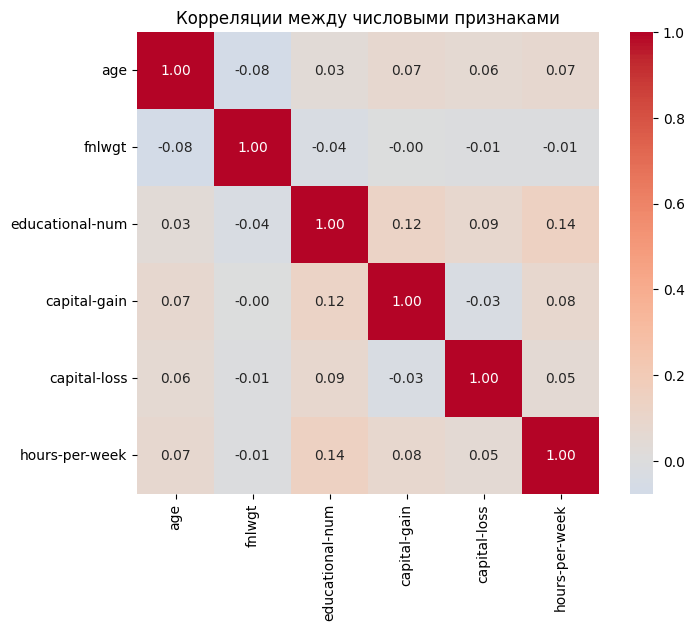

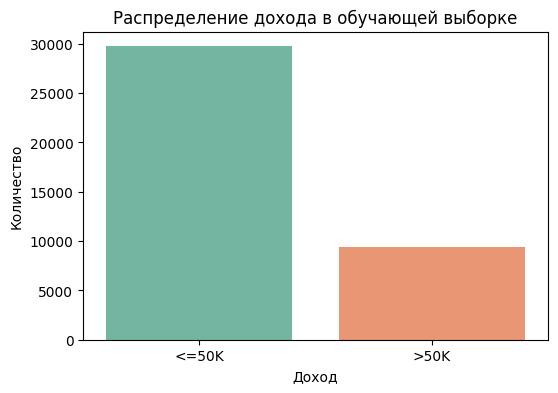

In [4]:
import matplotlib.pyplot as plt  
import seaborn as sns

numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'gender', 'native-country']

display(X_train[numeric_features].describe().T)

corr = X_train[numeric_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f", square=True)
plt.title("Корреляции между числовыми признаками")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, hue=y_train, palette="Set2", legend=False)
plt.title("Распределение дохода в обучающей выборке")
plt.xlabel("Доход")
plt.ylabel("Количество")
plt.show()

### 4. Обработка пропущенных значений

In [5]:
import numpy as np

X_train = X_train.replace('?', np.nan)
X_test = X_test.replace('?', np.nan)

print("\nПропущенные значения до обработки:")
print("Обучающая выборка:")
missing_train = X_train.isna().sum()
print(missing_train[missing_train > 0])
print("\nТестовая выборка:")
missing_test = X_test.isna().sum()
print(missing_test[missing_test > 0])

for col in categorical_features:
    if X_train[col].isna().any():
        mode_val = X_train[col].mode()[0]
        X_train[col] = X_train[col].fillna(mode_val)
        X_test[col] = X_test[col].fillna(mode_val)

for col in numeric_features:
    if X_train[col].isna().any():
        median_val = X_train[col].median()
        X_train[col] = X_train[col].fillna(median_val)
        X_test[col] = X_test[col].fillna(median_val)

print("\nПропущенные значения после обработки:")
print("Обучающая выборка:", X_train.isna().sum().sum())
print("Тестовая выборка:", X_test.isna().sum().sum())


Пропущенные значения до обработки:
Обучающая выборка:
workclass         2224
occupation        2234
native-country     681
dtype: int64

Тестовая выборка:
workclass         575
occupation        575
native-country    176
dtype: int64

Пропущенные значения после обработки:
Обучающая выборка: 0
Тестовая выборка: 0


### 5. Обработка категориальных признаков

In [6]:
from sklearn.preprocessing import OneHotEncoder

def limit_categories(series, top_n=10):
    top_cats = series.value_counts().index[:top_n]
    return series.where(series.isin(top_cats), 'Other')

X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

for col in ['native-country', 'occupation']:
    X_train_processed[col] = limit_categories(X_train[col], top_n=10)
    X_test_processed[col] = X_test[col].where(
        X_test[col].isin(X_train_processed[col].unique()), 
        'Other'
    )

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train_processed[categorical_features])
X_test_encoded = encoder.transform(X_test_processed[categorical_features])

encoded_feature_names = encoder.get_feature_names_out(categorical_features)
X_train_cat = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_cat = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

print(f"Исходное число категориальных признаков: {len(categorical_features)}")
print(f"Число признаков после one-hot encoding: {X_train_cat.shape[1]}")

Исходное число категориальных признаков: 8
Число признаков после one-hot encoding: 58


### 6. Нормализация признаков

In [7]:
from sklearn.preprocessing import StandardScaler

X_train_full = pd.concat([X_train[numeric_features], X_train_cat], axis=1)
X_test_full = pd.concat([X_test[numeric_features], X_test_cat], axis=1)

scaler = StandardScaler()


X_train_scaled = X_train_full.copy()
X_test_scaled = X_test_full.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train_full[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test_full[numeric_features])

display(X_train_scaled[numeric_features].describe().round(2))

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,39073.00,39073.00,39073.00,39073.00,39073.00,39073.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.58,-1.69,-3.53,-0.14,-0.22,-3.18
25%,-0.78,-0.68,-0.42,-0.14,-0.22,-0.04
50%,-0.12,-0.11,-0.03,-0.14,-0.22,-0.04
75%,0.68,0.46,0.75,-0.14,-0.22,0.37
max,3.73,12.32,2.30,13.49,10.44,4.72


### 7. Запуск классификатора (kNN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

print("Метрики на обучающей выборке:")
print(classification_report(y_train, y_train_pred))

print("\nМетрики на тестовой выборке:")
print(classification_report(y_test, y_test_pred))

Метрики на обучающей выборке:
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     29724
        >50K       1.00      1.00      1.00      9349

    accuracy                           1.00     39073
   macro avg       1.00      1.00      1.00     39073
weighted avg       1.00      1.00      1.00     39073


Метрики на тестовой выборке:
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      7431
        >50K       0.66      0.61      0.64      2338

    accuracy                           0.83      9769
   macro avg       0.77      0.76      0.76      9769
weighted avg       0.83      0.83      0.83      9769



### 8. Вычисление ошибок и подбор гиперпараметра

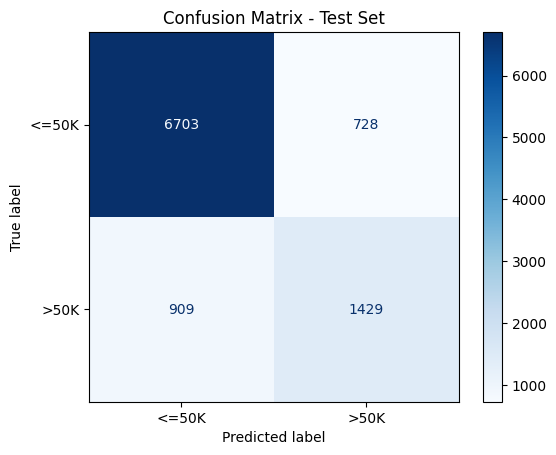

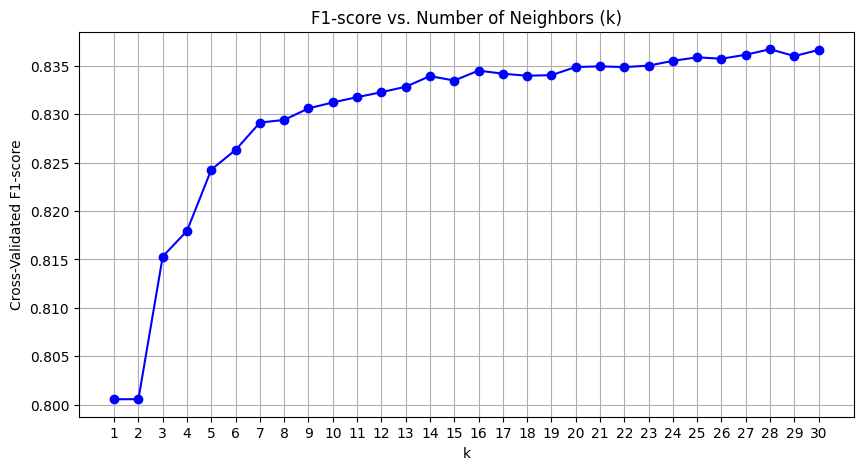


Оптимальное значение k: 28 (F1-score = 0.8367)

Метрики с оптимальным k
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7431
        >50K       0.70      0.61      0.65      2338

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

k_range = range(1, 31)
f1_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    scores = cross_val_score(knn_temp, X_train_scaled, y_train, cv=5, scoring='f1_weighted')
    f1_scores.append(scores.mean())

plt.figure(figsize=(10, 5))
plt.plot(k_range, f1_scores, marker='o', linestyle='-', color='b')
plt.title('F1-score vs. Number of Neighbors (k)')
plt.xlabel('k')
plt.ylabel('Cross-Validated F1-score')
plt.grid(True)
plt.xticks(k_range)
plt.show()

best_k = k_range[np.argmax(f1_scores)]
print(f"\nОптимальное значение k: {best_k} (F1-score = {max(f1_scores):.4f})")

knn_best = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='euclidean')
knn_best.fit(X_train_scaled, y_train)

y_test_pred_best = knn_best.predict(X_test_scaled)

print("\nМетрики с оптимальным k")
print(classification_report(y_test, y_test_pred_best))

### 9. Выводы

Задача бинарной классификации дохода решена с использованием kNN-классификатора. Модель достигла тестовой точности ~83% и F1-score ~0.77–0.80, что является хорошим результатом для данного датасета. Однако модель хуже распознаёт редкий класс (>50K): recall ≈ 0.61. Оптимальное число соседей k подобрано через кросс-валидацию по F1-score. Несмотря на корректную предобработку, kNN оказался чувствителен к выбросам и высокой размерности. 